# Term_Deposits

## 1. Term Deposits

This is a classification project where I try to use SMOTE for my first time.
Dataset: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketingtargets?select=train.csv

The purpose of the following work is to work with classification problems where one target class is
over-represented

## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(15,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

import warnings
warnings.simplefilter(action='ignore')

## 3 Importing Data

In [2]:
bank=pd.read_csv("/kaggle/input/banking-train/train.csv",delimiter=';').rename(columns={'y':'subscription'})

In [3]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 4. EDA

A few questions for EDA:
    
1- What is the average number of contacts received by customers who subscribed and ones who did
not?

2- Is a previous succesfull campaign more likely to lead to a subscription?

3- Which contact type is the most succesful?

4- Which previous contact month is the most frequent among those who subscribed?

5- What is the average balance of new subscribers?

### 4.1 General Information

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  subscription  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- There are no missing value

In [5]:
bank[bank.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription


- There are no duplicated values

**Desciptive Statictis Analysis**

In [6]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


**Covariance Matrix**

In [7]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### 4.2 Question 1- What is the average number of contacs received by customers who subscribed and ones who did not?
Creating two dataset to distingguish who subscribed and who didnot subscribe.

In [8]:
sub=bank[bank.subscription=='yes']
no_sub=bank[bank.subscription=='no']

In [9]:
sub.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0
balance,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0
day,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0
duration,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0
campaign,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0
pdays,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0
previous,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


In [10]:
no_sub.describe()

,age,balance,day,duration,campaign,pdays,previous
count,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000
mean,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
std,10.172662,2974.195473,8.294728,207.383237,3.212767,96.757135,2.256771
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,58.000000,8.000000,95.000000,1.000000,-1.000000,0.000000
50%,39.000000,417.000000,16.000000,164.000000,2.000000,-1.000000,0.000000
75%,48.000000,1345.000000,21.000000,279.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 4.3 Question 2 - Is a previous succesfull campain more likely to lead to a subscription?

In [11]:
sub.poutcome.value_counts()

unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64

In [12]:
no_sub.poutcome.value_counts()

unknown    33573
failure     4283
other       1533
success      533
Name: poutcome, dtype: int64

<AxesSubplot:title={'center':'No Subcribed'}>

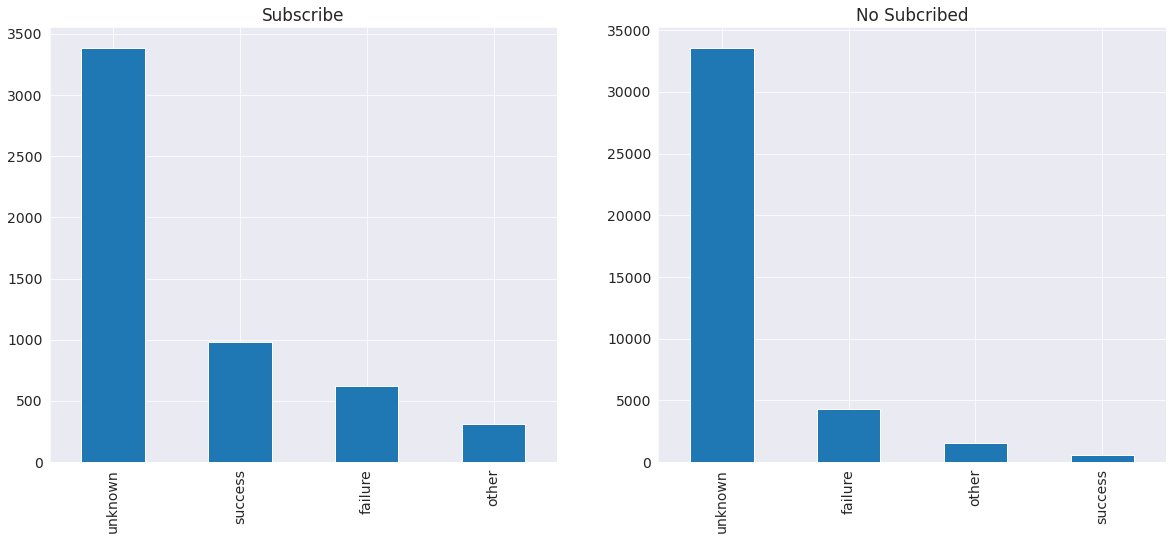

In [13]:
fix,ax=plt.subplots(1,2,figsize=(20,8))

sub.poutcome.value_counts().plot(kind='bar',ax=ax[0],title='Subscribe')
no_sub.poutcome.value_counts().plot(kind="bar",ax=ax[1],title="No Subcribed")

For both situations the unknown class is the most common one.

By the way, among those ones who subscribed with a contact type by the entire number of people contacted with that mean.

### 4.4 Question 3- Which contact type is the most succesful?

Diving the number of people who subscribed with a contact type with a contract type the entire number of people contacted with that mean.

In [14]:
(sub.contact.value_counts()/bank.contact.value_counts()).sort_values(ascending=False)

cellular     0.149189
telephone    0.134205
unknown      0.040707
Name: contact, dtype: float64

- Cellular seems to be the most succesful.

### 4.5 Question 4 - Which previous contact moth is the most frequent among those who subscibed?

Text(0.5, 1.0, 'The campain was done during the spring and summer period')

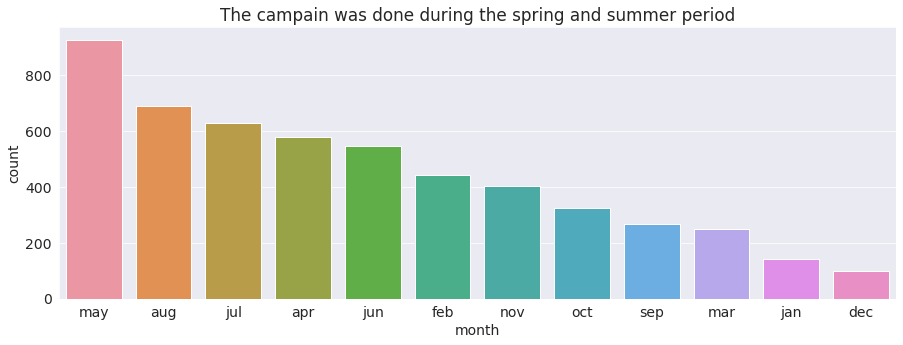

In [15]:
sns.countplot(data=sub,x="month",order=sub.month.value_counts().index)
plt.title("The campain was done during the spring and summer period")

- Probaly the campaign was during the spring and summer period.

### 4.6 Question 5 - What is the average balance of new subscribers?

In [16]:
sub.balance.describe()

count     5289.000000
mean      1804.267915
std       3501.104777
min      -3058.000000
25%        210.000000
50%        733.000000
75%       2159.000000
max      81204.000000
Name: balance, dtype: float64

In [17]:
no_sub.balance.describe()

count     39922.000000
mean       1303.714969
std        2974.195473
min       -8019.000000
25%          58.000000
50%         417.000000
75%        1345.000000
max      102127.000000
Name: balance, dtype: float64

- The subscribers have, on average, a higher balance.

## 5. Feature Engineering
- Dividing in inputs and target

In [18]:
X=bank.drop(columns='subscription')
y=bank.subscription

In [19]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [20]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: subscription, dtype: object

### 5.1 Defining Categorical And Numberical Columns

In [21]:
numerical_cols=X.select_dtypes(include=np.number).columns.to_list()
categorical_cols=X.select_dtypes(include='object').columns.to_list()

In [22]:
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [23]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

### 5.2 Scaling Numerical Columns

In [24]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler().fit(X[numerical_cols])

X[numerical_cols]=scaler.transform(X[numerical_cols])

In [25]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.266667,management,married,tertiary,no,1.250000,yes,no,unknown,-0.846154,may,0.375000,-0.5,0.0,0.0,unknown
1,0.333333,technician,single,secondary,no,-0.308997,yes,no,unknown,-0.846154,may,-0.134259,-0.5,0.0,0.0,unknown
2,-0.400000,entrepreneur,married,secondary,no,-0.328909,yes,yes,unknown,-0.846154,may,-0.481481,-0.5,0.0,0.0,unknown
3,0.533333,blue-collar,married,unknown,no,0.780236,yes,no,unknown,-0.846154,may,-0.407407,-0.5,0.0,0.0,unknown
4,-0.400000,unknown,single,unknown,no,-0.329646,no,no,unknown,-0.846154,may,0.083333,-0.5,0.0,0.0,unknown


### 5.3 One-Hot Encoding Categorical Columns


In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder= OneHotEncoder(sparse=False).fit(X[categorical_cols])

encoder_cols=list(encoder.get_feature_names_out(categorical_cols))
X[encoder_cols]=encoder.transform(X[categorical_cols])

In [27]:
 X.drop(columns=categorical_cols, inplace=True)

### 5.4 Changing “yes” and “no” into 0 and 1

In [28]:
subs_dict = {'no':0, 'yes':1}

y = y.map(subs_dict)

In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: subscription, Length: 45211, dtype: int64

## 6 Splitting the Dataest

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.20,random_state=42)

## 7 Creating the Machine Learning Model

In [31]:
from xgboost import XGBClassifier

ml_model = XGBClassifier(n_jobs=-1, n_estimators=1000,early_stopping_rounds=50, random_state=42)
ml_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-logloss:0.50882	validation_1-logloss:0.51269
[1]	validation_0-logloss:0.40632	validation_1-logloss:0.41326
[2]	validation_0-logloss:0.34284	validation_1-logloss:0.35205
[3]	validation_0-logloss:0.30024	validation_1-logloss:0.31194
[4]	validation_0-logloss:0.27136	validation_1-logloss:0.28540
[5]	validation_0-logloss:0.25087	validation_1-logloss:0.26762
[6]	validation_0-logloss:0.23562	validation_1-logloss:0.25386
[7]	validation_0-logloss:0.22489	validation_1-logloss:0.24418
[8]	validation_0-logloss:0.21467	validation_1-logloss:0.23446
[9]	validation_0-logloss:0.20816	validation_1-logloss:0.22900
[10]	validation_0-logloss:0.20238	validation_1-logloss:0.22402
[11]	validation_0-logloss:0.19811	validation_1-logloss:0.22068
[12]	validation_0-logloss:0.19492	validation_1-logloss:0.21786
[13]	validation_0-logloss:0.19257	validation_1-logloss:0.21655
[14]	validation_0-logloss:0.19002	validation_1-logloss:0.21482
[15]	validation_0-logloss:0.18766	validation_1-logloss:0.21355
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [32]:
ml_model.best_ntree_limit

59

In [33]:
ml_model = XGBClassifier(n_jobs=-1, n_estimators=59, random_state=42)
ml_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=59,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

- Checking the accuracy

In [34]:
from sklearn.metrics import accuracy_score
print('Train Accuracy: {}'.format(accuracy_score(y_train, ml_model.predict(X_train))))
print('Validation Accuracy: {}'.format(accuracy_score(y_val, ml_model.predict(X_val))))

Train Accuracy: 0.9421311656713116
Validation Accuracy: 0.9086586309852925


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_val, ml_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.49      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043



- On will be used SMOTE

## 8 Dataset Balancing

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

# Creating two new X and y with SMOTE

X_sm, y_sm = smote.fit_resample(X,y)

In [37]:
X_sm

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.266667,1.250000,-0.846154,0.375000,-0.500000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
1,0.333333,-0.308997,-0.846154,-0.134259,-0.500000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
2,-0.400000,-0.328909,-0.846154,-0.481481,-0.500000,0.0,0.0,0.000000,0.000000,1.0,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
3,0.533333,0.780236,-0.846154,-0.407407,-0.500000,0.0,0.0,0.000000,1.000000,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
4,-0.400000,-0.329646,-0.846154,0.083333,-0.500000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,1.800271,1.163182,0.175958,0.211594,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
79840,-0.502075,-0.502628,0.846154,3.000536,-0.132782,0.0,0.0,1.000000,0.000000,0.0,...,0.734435,0.0,0.265565,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
79841,0.250985,-0.020359,-0.586951,8.819525,-0.016802,0.0,0.0,0.000000,0.000000,0.0,...,0.033603,0.0,0.966397,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
79842,1.988103,0.037104,0.349950,1.291537,-0.314556,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0


In [38]:
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
79839    1
79840    1
79841    1
79842    1
79843    1
Name: subscription, Length: 79844, dtype: int64

- Seeing the differance.

In [39]:
y.value_counts()

0    39922
1     5289
Name: subscription, dtype: int64

In [40]:
y_sm.value_counts()

0    39922
1    39922
Name: subscription, dtype: int64

- Now classes are balanced

### 8.1 Splitting

In [41]:
X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(X_sm, y_sm,stratify=y_sm ,test_size=0.20, random_state=42)

### 8.2 Splitting 

In [42]:
ml_model_sm = XGBClassifier(n_jobs=-1, n_estimators=1000,early_stopping_rounds=50, random_state=42)

ml_model_sm.fit(X_train_sm, y_train_sm, eval_set=[(X_train_sm, y_train_sm),(X_val_sm, y_val_sm)])

[0]	validation_0-logloss:0.54820	validation_1-logloss:0.55087
[1]	validation_0-logloss:0.46635	validation_1-logloss:0.47091
[2]	validation_0-logloss:0.41244	validation_1-logloss:0.41801
[3]	validation_0-logloss:0.37575	validation_1-logloss:0.38157
[4]	validation_0-logloss:0.34590	validation_1-logloss:0.35200
[5]	validation_0-logloss:0.32233	validation_1-logloss:0.32962
[6]	validation_0-logloss:0.30417	validation_1-logloss:0.31198
[7]	validation_0-logloss:0.28775	validation_1-logloss:0.29509
[8]	validation_0-logloss:0.26087	validation_1-logloss:0.26885
[9]	validation_0-logloss:0.25030	validation_1-logloss:0.25858
[10]	validation_0-logloss:0.23924	validation_1-logloss:0.24759
[11]	validation_0-logloss:0.22458	validation_1-logloss:0.23324
[12]	validation_0-logloss:0.21895	validation_1-logloss:0.22722
[13]	validation_0-logloss:0.21068	validation_1-logloss:0.21857
[14]	validation_0-logloss:0.20628	validation_1-logloss:0.21426
[15]	validation_0-logloss:0.19932	validation_1-logloss:0.20778
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
ml_model_sm.best_ntree_limit

133

In [44]:
ml_model_sm = XGBClassifier(n_jobs=-1, n_estimators=183, random_state=42)
ml_model_sm.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=183,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

**Checking  the accuracy.**

In [45]:
print('Train Accuracy: {}'.format(accuracy_score(y_train_sm, ml_model_sm. predict(X_train_sm))))

print('Validation Accuracy: {}'.format(accuracy_score(y_val_sm, ml_model_sm.predict(X_val_sm))))

Train Accuracy: 0.9805714285714285
Validation Accuracy: 0.9481495397332331


**Checking the Classication Report**

In [46]:
print(classification_report(y_val, ml_model.predict(X_val)))
print(classification_report(y_val_sm, ml_model_sm.predict(X_val_sm)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.49      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7985
           1       0.95      0.94      0.95      7984

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969



- The performance has imporoved a lot